# Assignment : Lending Club Case Study

Team : Prashant Dahiya and Yatharth Tripathi

Date : 9/10/2023

# <font color='green'>LendingClub Case Study

- Lending Club provides loans to borrowers, but a lot of borrowers default, that is they do not return the borrowed amount along with accumulated interest back to the lenders.
- Such defaults results in monetary loss to the businesses or lenders.
- Hence, the purpose of this case study is to identify some of the prominent factors which can help understanding borrowers who have higher probability of defaulting.
- In this project, some of the factors have been analyzed and identified from the data and have been reported.

### <font color='green'> Objective

The company wants to understand the driving factors (or driver variables) behind loan default (loan_status = 'Charged Off'), i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.


##  <font color='green'> Note : Links to directly go to certain section 
* [Importing Libraries](#Libraries)
* [Importing Data](#Importing)
* [Cleaning the data](#Cleaning)
* [Summary of each column and Univariate analysis](#univariate)
* [Bivariate analysis](#Bivariate)

<a id="Libraries"></a>
## <font color='green'>Importing Libraries required</font>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<a id="Importing"></a>
## <font color='green'> Importing data</font> 


In [2]:
df_loan = pd.read_csv("loan.csv",low_memory=False)
df_colums = pd.read_excel("Data_Dictionary.xlsx")

In [3]:
df_loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_colums #all column definitions 

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
...,...,...
112,verification_status,"Indicates if income was verified by LC, not ve..."
113,verified_status_joint,Indicates if the co-borrowers' joint income wa...
114,zip_code,The first 3 numbers of the zip code provided b...
115,NaN,NaN


<a id="Cleaning"></a>
# <font color='green'>Cleaning the data</font>

## Checking whether all columns are present in both loan and loan column definition dataset

In [5]:
df_colums = df_colums.dropna(axis=1, how='all')#remove any nulls collums in the data

In [6]:
set(df_loan.columns) - set(df_colums["LoanStatNew"]) #difference of columns in given data and columns defined data

{'total_rev_hi_lim', 'verification_status_joint'}

<b>These columns are not present in the data definition so we can drop these columns as they might not be useful

In [7]:
df_loan=df_loan.drop(['total_rev_hi_lim', 'verification_status_joint'],axis=1)

<b>Dropping all the columns where all the values in it are null

In [8]:
df_loan=df_loan.dropna(axis=1,how="all")

<b> Shape of the data after dropping the columns 

In [9]:
df_loan.shape

(39717, 57)

<b><i> Checking total number of nulls present in each column

In [10]:
df_loan.isna().sum()[df_loan.isna().sum() > 0] 

emp_title                      2459
emp_length                     1075
desc                          12942
title                            11
mths_since_last_delinq        25682
mths_since_last_record        36931
revol_util                       50
last_pymnt_d                     71
next_pymnt_d                  38577
last_credit_pull_d                2
collections_12_mths_ex_med       56
chargeoff_within_12_mths         56
pub_rec_bankruptcies            697
tax_liens                        39
dtype: int64

<b>Removing outliers (removing columns having high null values)

<Axes: >

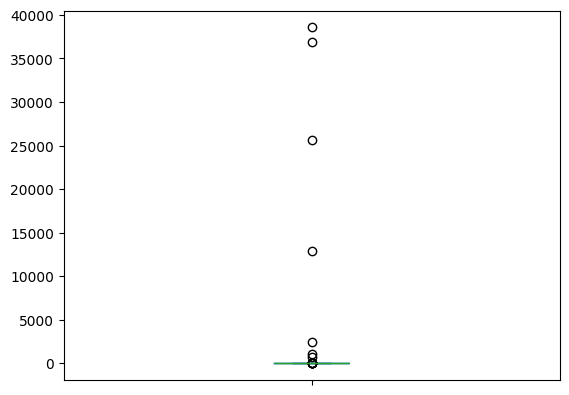

In [11]:
df_loan.isna().sum().plot.box()  #by this we get to know how many columns are very hight null values

<i><b>All these columns are having high null values -> 'desc' 'mths_since_last_record' 'next_pymnt_d' 'mths_since_last_delinq' 

In [12]:
df_loan=df_loan.drop(['desc','mths_since_last_record','next_pymnt_d','mths_since_last_delinq'],axis=1) # droping all outliers in box plot

<i><b>Drop all rows having high null values in the columns 'pub_rec_bankruptcies' 'emp_title' 'emp_length'

In [13]:
df_loan=df_loan[~df_loan.pub_rec_bankruptcies.isna()]

In [14]:
df_loan=df_loan[~df_loan.emp_title.isna()]

In [15]:
df_loan = df_loan[~df_loan["emp_length"].isna()] # removing null values 

<i><b>Left over null values

In [16]:
df_loan.isna().sum()[df_loan.isna().sum() > 0] 

title                          9
revol_util                    46
last_pymnt_d                  64
collections_12_mths_ex_med     2
chargeoff_within_12_mths       2
dtype: int64

In [17]:
df_loan.shape 

(36548, 53)

<i><b>List of Columns left for analysis 

In [18]:
df_loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

# Since we have cleaned data set and have parameters for our EDA. let's proceed with EDA



# <font color='green'>Data Analysis</font>
## <font color='green'>Univariate analysis</font>

###  NOTE :
 + <b>First we understood the columns</b>
 + <b>After that we removed outliers</b>
 + <b>Then we performed univariate analysis wherever required</b>
<a id="univariate"></a>

***Id*** :A unique ID for the loan listing.
+ given data type is int need to be string because id should not be manipulated

In [19]:
df_loan["id"]= df_loan["id"].astype('string')

***member_id*** : A unique LC assigned Id for the borrower member
+ given data type is int need to be string because id should not be manipulated

In [20]:
df_loan["member_id"] = df_loan["member_id"].astype('string')

***loan_amnt*** : The listed amount of the loan applied for by the borrower

In [21]:
df_loan["loan_amnt"].describe()

count    36548.000000
mean     11294.866340
std       7435.395805
min        500.000000
25%       5600.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

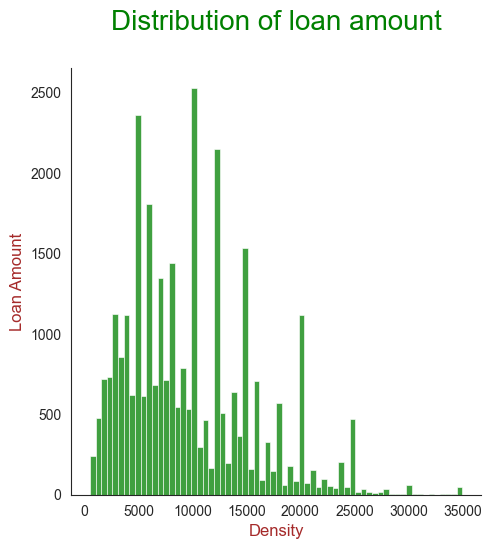

In [153]:
#ploting the graph 
sns.set_style("white")
sns.displot(df_loan.loan_amnt, color="g")

# Labeling Axes
plt.xlabel("Density", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Loan Amount", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

# Adding and formatting title
plt.title("Distribution of loan amount\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.show()

<font color='Orange'>***Insights***</font>

+ Loan applied lies between 500 to 35000 
+ By this graph we got to understand that most of the loan borrowers need money under 15000
+ Majority of borrowers asked for rounded number that is 5000 , 10,000 as observed from the Distribution graph

***funded_amnt*** : The total amount committed to that loan at that point in time
 + funded_amnt lies in between 500 to 35000


In [23]:
df_loan["funded_amnt"].describe()

count    36548.000000
mean     11020.644769
std       7168.173439
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

***derived matrix***: New column added with name loan_approval = percent of money funded to them of what they asked 


In [24]:
df_loan["loan_approval"] = df_loan["funded_amnt"]/df_loan["loan_amnt"]*100

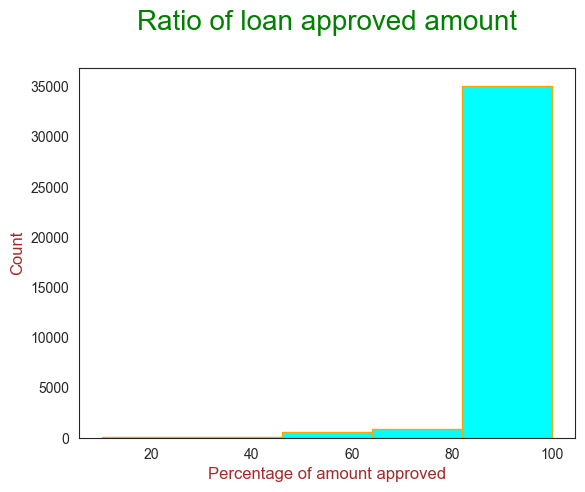

In [25]:
# plotting bar chart and setting bar width to 0.5 and aligning it to center
plt.hist(df_loan["loan_approval"], bins=5, align='mid', edgecolor='Orange',color='cyan')

# Adding and formatting title
plt.title("Ratio of loan approved amount\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("Percentage of amount approved", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

<font color='Orange'>***Insights***</font> 

+ Majority of the people were funded 

***funded_amnt_inv*** : The total amount committed by investors for that loan at that point in time
    
 

In [26]:
df_loan["funded_amnt_inv"].describe()

count    36548.000000
mean     10586.433390
std       7073.216233
min          0.000000
25%       5000.000000
50%       9175.000000
75%      14500.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

In [27]:
zero_inv=df_loan[df_loan["funded_amnt_inv"] == 0] # there are 129 row with 0

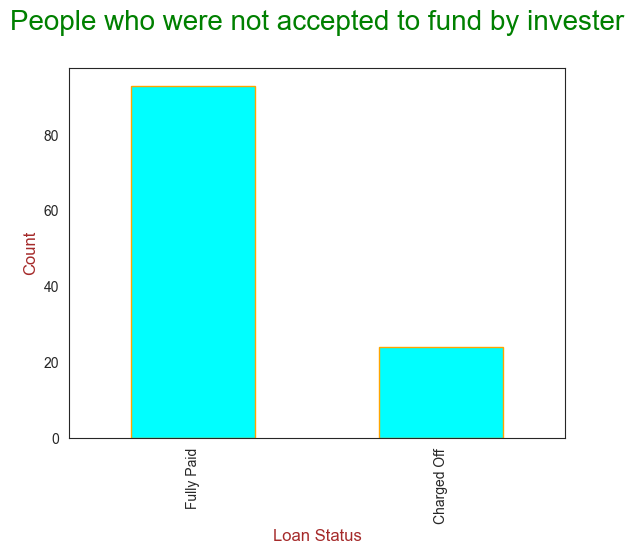

In [28]:
# plotting bar chart and setting bar width to 0.5 and aligning it to center
zero_inv.loan_status.value_counts().plot.bar(align='center', edgecolor='Orange',color='cyan')

# Adding and formatting title
plt.title("People who were not accepted to fund by invester\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("Loan Status", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

<font color='Orange'>***Insights***</font>
 
  + funded_amnt_inv lies between 0 to 35000 but there are 129 records with 0 this might be because investor did want to invest 
  + In the 129 records majority of the people paid off the loan so it is better to provide them loans and reduce the <b>business loss 

***term*** : The number of payments on the loan. Values are in months and can be either 36 or 60. 
 

In [29]:
df_loan["term"].value_counts()

term
 36 months    26471
 60 months    10077
Name: count, dtype: int64

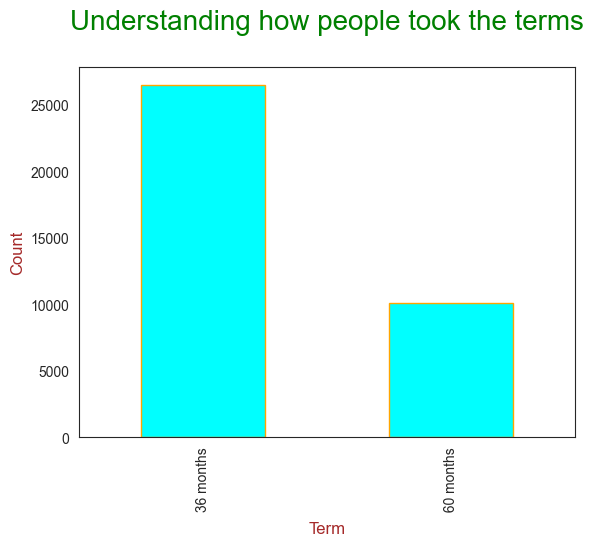

In [30]:
# plotting bar chart and setting bar aligning it to center
df_loan["term"].value_counts().plot.bar(align='center', edgecolor='Orange',color='cyan')

# Adding and formatting title
plt.title("Understanding how people took the terms\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("Term", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

<font color='Orange'>***Insights***</font>
+ There are two values 36 and 60 months 
+ By this we get to understand that majority of the people have took the 36 months tenure period

***int_rate*** : Interest Rate on the loan 
 

In [31]:
df_loan["int_rate"].value_counts() #we have to fix the data type string -> float

int_rate
10.99%    901
13.49%    787
11.49%    772
7.51%     732
7.88%     674
         ... 
24.40%      1
22.94%      1
13.84%      1
16.96%      1
11.22%      1
Name: count, Length: 334, dtype: int64

In [32]:
def remove_last_char_tofloat(x): # creating a generic function which will remove '%' and convert into flaot
    x = x[:-1]
    return float(x) 

In [33]:
#applying the function to columns
df_loan["int_rate"]=df_loan["int_rate"].apply(remove_last_char_tofloat)

In [34]:
df_loan["int_rate"].dtype

dtype('float64')

In [35]:
df_loan["int_rate"].describe()

count    36548.000000
mean        12.081942
std          3.735718
min          5.420000
25%          9.320000
50%         11.860000
75%         14.650000
max         24.400000
Name: int_rate, dtype: float64

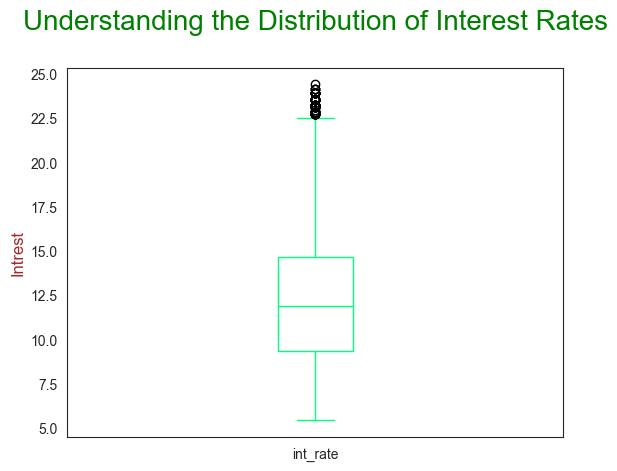

In [36]:

# plotting bar chart and setting bar aligning it to center
df_loan["int_rate"].plot.box(color='springgreen')

# Adding and formatting title
plt.title("Understanding the Distribution of Interest Rates\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

# Labeling Axes
plt.ylabel("Intrest", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

<font color='Orange'>***Insights***</font>
 + Given data in string - Need to fix the data type to float
 + int_rate lies between 5% to 24% 
 + High interest implies high risk and vice versa 
 + From the graph we can say majority of the people are lying in between 10 to 15 percent interest rate 
    

***installment*** : The monthly payment owed by the borrower if the loan originates.

In [37]:
df_loan["installment"].describe()

count    36548.000000
mean       325.860813
std        207.420129
min         16.080000
25%        168.730000
50%        282.955000
75%        431.682500
max       1305.190000
Name: installment, dtype: float64

In [38]:
df_loan= df_loan[df_loan["installment"] < 700] ## removing the ouliers 

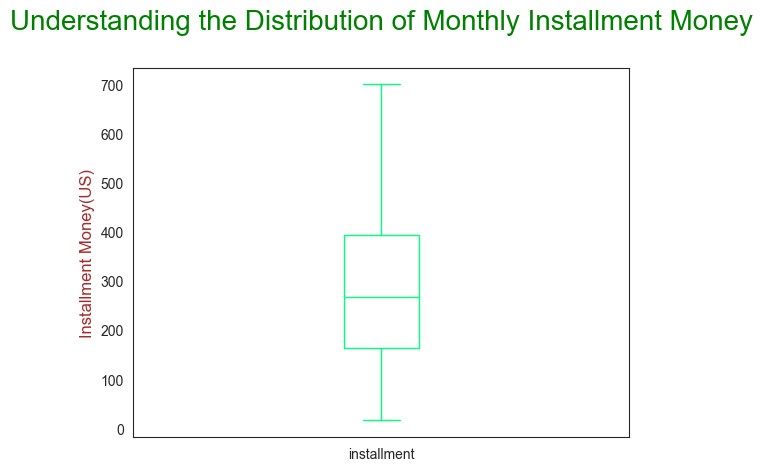

In [39]:
# plotting bar chart and setting bar aligning it to center
df_loan["installment"].plot.box(color='springgreen')

# Adding and formatting title
plt.title("Understanding the Distribution of Monthly Installment Money\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

# Labeling Axes
plt.ylabel("Installment Money(US)", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

<font color='Orange'>***Insights***</font>
  + Installment lies between 15 to 1305 where 75 percentile data lies under 430 
  + This implies that there are some outliers who are paying high amount in one installment
  + IQR(Inter quartile range) is 263 
  + Majority of the people have monthly installment between 160 and 430 


***grade*** : LC assigned loan grade

In [40]:
df_loan["grade"].value_counts()

grade
B    10436
A     8986
C     7132
D     4482
E     2267
F      765
G      216
Name: count, dtype: int64

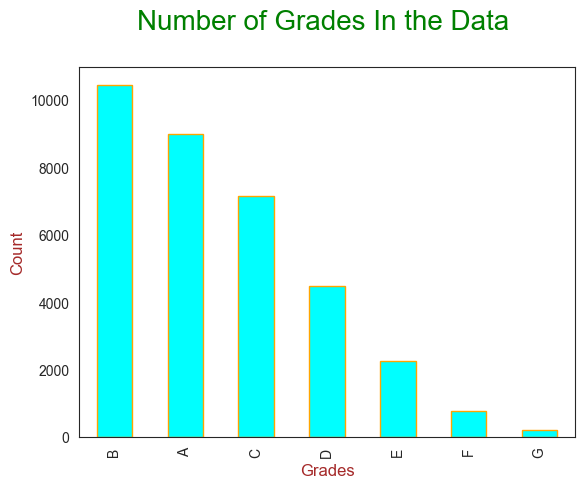

In [41]:
# plotting bar chart and setting bar aligning it to center
df_loan["grade"].value_counts().plot.bar(align='center', edgecolor='Orange',color='cyan')

# Adding and formatting title
plt.title("Number of Grades In the Data \n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("Grades", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

<font color='Orange'>***Insights***</font>
 + B grade loans are nearly 12020 which is the highest number of loan given

***sub_grade*** : LC assigned loan subgrade


In [42]:
df_loan["sub_grade"].value_counts()

sub_grade
A4    2576
B3    2498
A5    2461
B5    2377
B4    2183
C1    1847
C2    1790
B2    1783
A3    1608
B1    1595
C3    1376
A2    1336
D2    1166
C4    1085
C5    1034
A1    1005
D3     996
D4     819
D1     779
D5     722
E1     628
E2     541
E3     445
E4     358
E5     295
F1     244
F2     192
F3     136
F4     119
F5      74
G1      69
G2      53
G4      42
G3      34
G5      18
Name: count, dtype: int64

<font color='Orange'>***Insights***</font>
+ Each grade is again divided into 5 subgrades like A1,A2,A3,A4,A5

***emp_title*** : The job title of the person applying for the loan.

In [43]:
df_loan["emp_title"].value_counts()

emp_title
US Army                                117
Bank of America                        104
IBM                                     56
Wells Fargo                             52
AT&T                                    52
                                      ... 
Jessamine County Board of Education      1
First Health Montgomery Hospital         1
Aegir Systems                            1
Intermark Group                          1
Fairfield Manufacturing                  1
Name: count, Length: 26769, dtype: int64

In [44]:
df_loan["emp_title"].isna().sum()

0

In [45]:
df_loan["emp_title"].value_counts().describe()

count    26769.000000
mean         1.280735
std          1.925864
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        117.000000
Name: count, dtype: float64

<font color='Orange'>***Insights***</font>
  + Majority of the people are from different companies and 75 percentile of data are unique, so we cannot find much insights from this data 

***emp_length*** : Employment length in years.


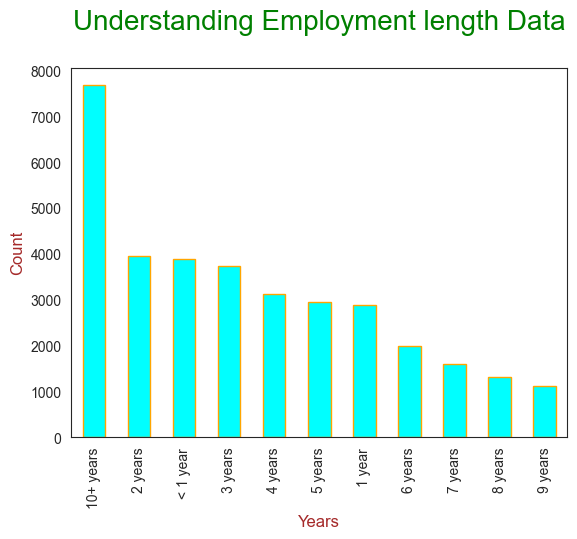

In [46]:
# plotting bar chart and setting bar aligning it to center
df_loan["emp_length"].value_counts().plot.bar(align='center', edgecolor='Orange',color='cyan')

# Adding and formatting title
plt.title("Understanding Employment length Data\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("Years", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

In [47]:
def clean_emp_year(x):
    x =  x.replace("years" , "")
    x =  x.replace("year" , "")
    x = x.replace("< 1" , "0")
    x = x.replace("+" , "")
    return int(x) 

In [48]:
df_loan["emp_length"] = df_loan["emp_length"].apply(clean_emp_year)#cleaning the data 

<font color='Orange'>***Insights***</font>

+ Possible values are between 0 and 10 where 0 denotes less than one year and 10 denotes ten or more years. 
+ 1075 null values are present
+ From the graph we can see that people having 10+ year experience are majority of applicants of the loan 

***home_ownership*** : The home ownership status provided by the borrower during registration. 


In [49]:
df_loan = df_loan[~(df_loan["home_ownership"] == "NONE")]# droping the rows with none

In [50]:
df_loan = df_loan[~(df_loan["home_ownership"] == "OTHER")]# droping the rows with Other value

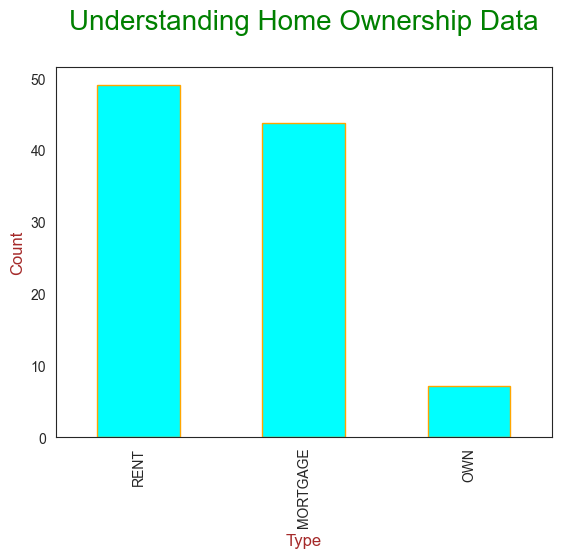

In [51]:
# plotting bar chart and setting bar aligning it to center
df_loan["home_ownership"].value_counts().apply(lambda x : x /df_loan["home_ownership"].shape[0]*100).plot.bar(align='center', edgecolor='Orange',color='cyan')

# Adding and formatting title
plt.title("Understanding Home Ownership Data\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("Type", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

<font color='Orange'>***Insights***</font>
  + Majority of the people who applied for the loan are living on rent or mortgage
  + This implies that 80% are not having full home ownership

***annual_inc*** : The self-reported annual income provided by the borrower during registration.
+ Maximum is very high and there are two oultlier (tis will miss-lead us)
+ So we can drop these records highter than > 30 lakhs 

In [52]:
df_loan["annual_inc"].max()

6000000.0

In [53]:
df_loan["annual_inc"].min()

4000.0

<Axes: >

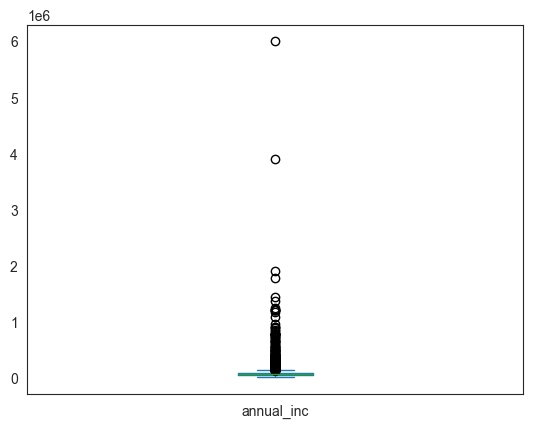

In [54]:
df_loan["annual_inc"].plot.box()

In [55]:
df_loan.shape # before droping the values

(34192, 54)

In [56]:
np.percentile(df_loan["annual_inc"],90)

109000.0

In [57]:
df_loan = df_loan[df_loan["annual_inc"] < 116000.0] # after droping the values 

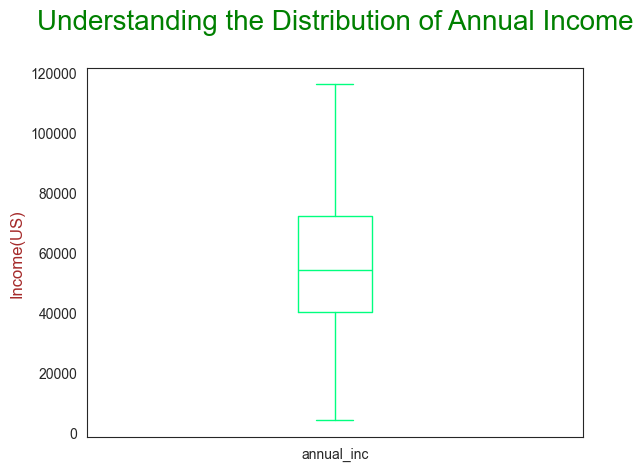

In [58]:
# plotting bar chart and setting bar aligning it to center
df_loan["annual_inc"].plot.box(color='springgreen')

# Adding and formatting title
plt.title("Understanding the Distribution of Annual Income\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

# Labeling Axes
plt.ylabel("Income(US)", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

<font color='Orange'>***Insights***</font>
+ Majority of the people's annual income is lies between 40000 to 80000

***verification_status*** : Indicates if income was verified by LC, not verified, or if the income source was verified

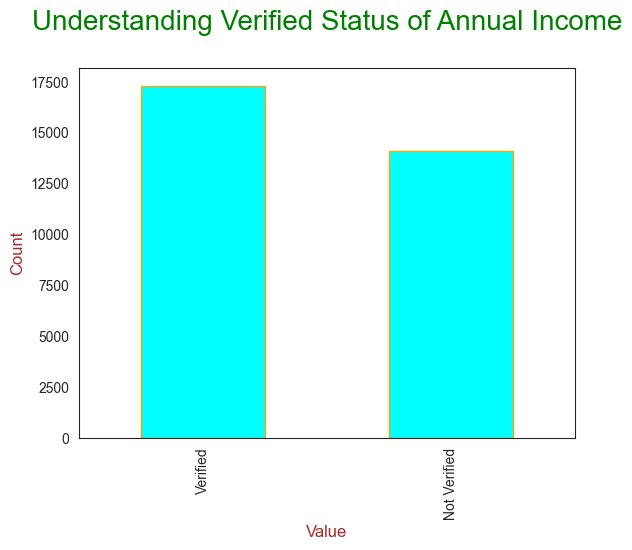

In [59]:
# plotting bar chart and setting bar aligning it to center
df_loan["verification_status"].apply(lambda x : "Verified" if x == "Source Verified" else x).value_counts().plot.bar(align='center', edgecolor='Orange',color='cyan')

# Adding and formatting title
plt.title("Understanding Verified Status of Annual Income\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("Value", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

<font color='Orange'>***Insights***</font>
  + Majority of the data for income is verified(65%)
  + But nearly 35% data about income is not verfied
  + Changed the values of source verified to verified (because end of the day they are atleast verified)

***issue_d*** : The month which the loan was funded

In [60]:
df_loan["issue_d"].value_counts()

issue_d
Dec-11    1819
Nov-11    1719
Sep-11    1589
Oct-11    1588
Aug-11    1521
Jul-11    1505
Jun-11    1458
May-11    1384
Apr-11    1261
Mar-11    1145
Jan-11    1143
Feb-11    1031
Dec-10    1025
Jul-10     960
Nov-10     937
Oct-10     928
Aug-10     919
Sep-10     905
Jun-10     869
May-10     752
Apr-10     671
Mar-10     574
Feb-10     487
Nov-09     461
Jan-10     427
Dec-09     427
Oct-09     417
Sep-09     383
Aug-09     348
Jul-09     309
Jun-09     305
May-09     268
Mar-09     249
Apr-09     245
Feb-09     222
Jan-09     202
Dec-08     179
Nov-08     154
Apr-08     130
Mar-08      99
Oct-08      77
Jul-08      74
May-08      63
Aug-08      61
Jun-08      56
Sep-08      27
Feb-08       6
Jan-08       6
Dec-07       2
Aug-07       2
Nov-07       1
Oct-07       1
Name: count, dtype: int64

In [61]:
df_loan["issue_d_month"]=df_loan["issue_d"].apply(lambda x : x[:3])

In [62]:
df_loan["issue_d_year"] = df_loan["issue_d"].apply(lambda x : x[4:])

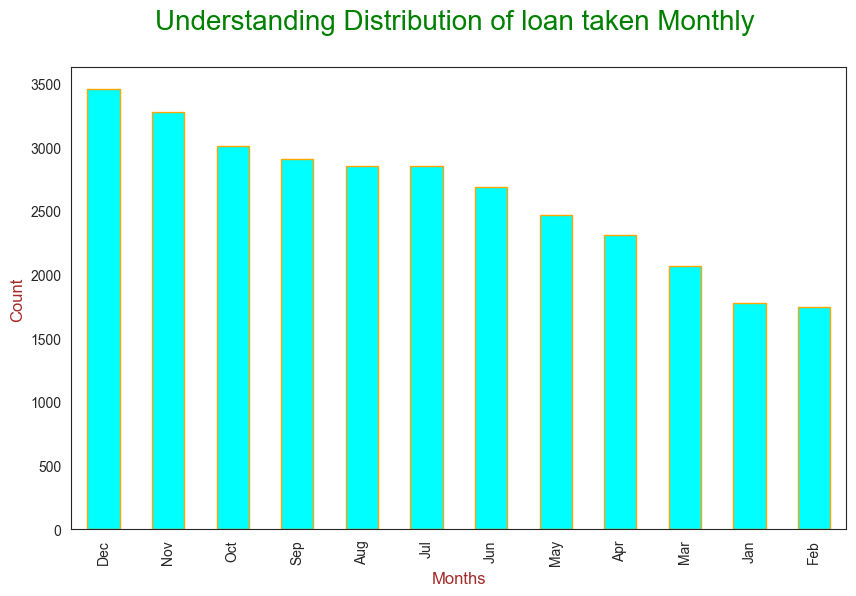

In [63]:
plt.figure(figsize = (10,6))

# plotting bar chart and setting bar aligning it to center
df_loan["issue_d_month"].value_counts().plot.bar(align='center', edgecolor='Orange',color='cyan')

# Adding and formatting title
plt.title("Understanding Distribution of loan taken Monthly \n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("Months", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

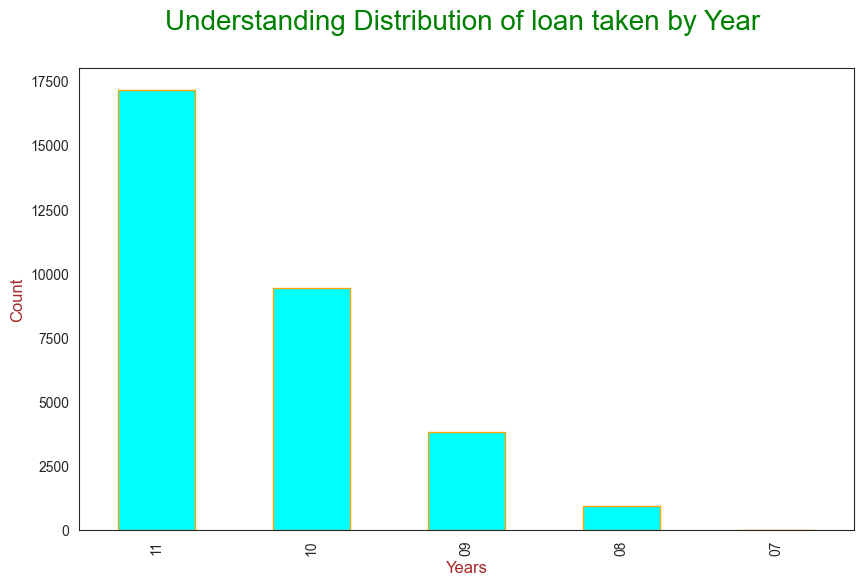

In [64]:
plt.figure(figsize = (10,6))

# plotting bar chart and setting bar aligning it to center
df_loan["issue_d_year"].value_counts().plot.bar(align='center', edgecolor='Orange',color='cyan')

# Adding and formatting title
plt.title("Understanding Distribution of loan taken by Year \n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("Years", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

 <font color='Orange'>***Insights***</font>:
 
 + All months are mentioned 
 + Splitting the months and years to two different column helps to find more insights
 + Majority of the people have taken loan in the end of the year
 + Need to promote other months also to increase profits
 + Majority of the people have taken loan in 2011 and after every year, the number of loan borrowers have increased 

***loan_status*** : Current status of the loan


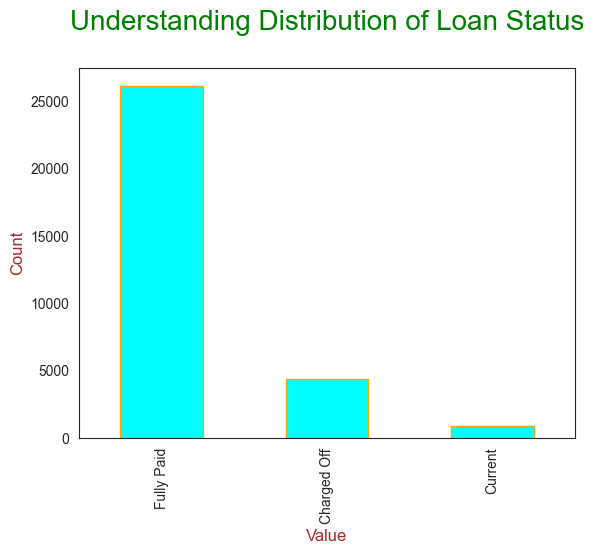

In [65]:
# plotting bar chart and setting bar aligning it to center
df_loan["loan_status"].value_counts().plot.bar(align='center', edgecolor='Orange',color='cyan')

# Adding and formatting title
plt.title("Understanding Distribution of Loan Status\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("Value", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

In [66]:
df_loan=df_loan[df_loan["loan_status"] != "Current"] 
#removing the current values rows because they can pay full ammount so we can't find much Insigths

<font color='Orange'>***Insights***</font>: ***important column***
+ There are three category of loan status 
+ Fully Paid,Charged Off ,Current 
+ We are removing current column because we cannot get much insight with these data 

***pymnt_plan*** :Indicates if a payment plan has been put in place for the loan
+ contains only n in all values so it is not helpful
+ so we can drop this column

In [67]:
df_loan["pymnt_plan"].value_counts()

pymnt_plan
n    30517
Name: count, dtype: int64

In [68]:
df_loan = df_loan.drop("pymnt_plan" ,axis=1)
df_loan.shape

(30517, 55)

***url*** : URL for the LC page with listing data.
+ this column is not use full for getting insights to reduces the risk 

In [69]:
df_loan["url"][1]

'https://lendingclub.com/browse/loanDetail.action?loan_id=1077430'

In [70]:
df_loan = df_loan.drop("url",axis=1)

In [71]:
df_loan.shape

(30517, 54)

***purpose*** : A category provided by the borrower for the loan request. 
+ different categorys like wedding,car etc  
+ 14 distict categorys 

In [72]:
df_loan["purpose"].value_counts()

purpose
debt_consolidation    14575
credit_card            3954
other                  3120
home_improvement       2036
major_purchase         1765
car                    1293
small_business         1071
wedding                 773
medical                 553
moving                  465
vacation                311
house                   273
educational             256
renewable_energy         72
Name: count, dtype: int64

In [73]:
df_loan = df_loan[~(df_loan["purpose"] == "renewable_energy")] # removing minimum number of columns

***title***  :The loan title provided by the borrower
+ Purpose he is taking the loan 
+ Already we have category of the loan and majority of the data that is 75% percentile data is unique values 
+ So we can drop this columns 

In [74]:
df_loan["title"].value_counts().describe()

count    15455.000000
mean         1.969330
std         19.349917
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max       1675.000000
Name: count, dtype: float64

In [75]:
df_loan = df_loan.drop("title",axis=1)

***zip_code*** :  The first 3 numbers of the zip code provided by the borrower in the loan application.

In [76]:
df_loan["zip_code"].value_counts()

zip_code
112xx    413
945xx    410
606xx    407
100xx    397
070xx    348
        ... 
736xx      1
332xx      1
461xx      1
093xx      1
479xx      1
Name: count, Length: 797, dtype: int64

<font color='Orange'>***Insights***</font>
+ Highest loans are taken from zip_code with 112XX
+ Half of the zip_codes were unique zip_codes

***addr_state*** : The state provided by the borrower in the loan application

In [77]:
df_loan["addr_state"].value_counts().describe()

count      49.000000
mean      621.326531
std       927.139404
min         1.000000
25%       123.000000
50%       351.000000
75%       660.000000
max      5383.000000
Name: count, dtype: float64

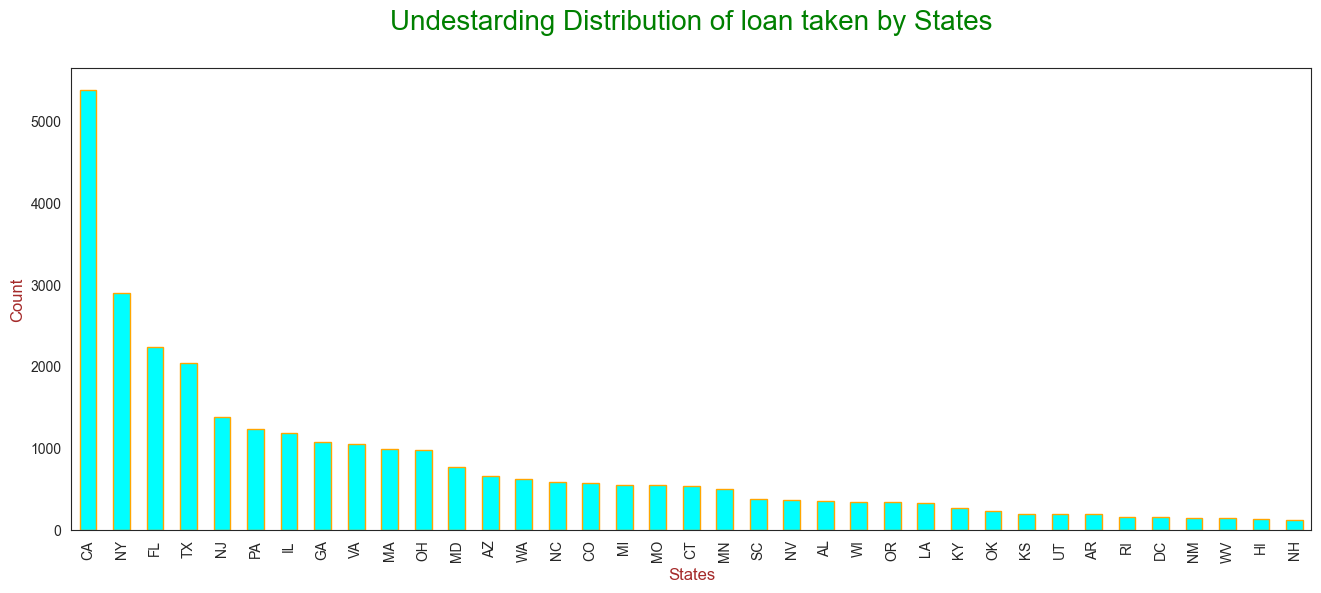

In [78]:
plt.figure(figsize = (16,6))

# plotting bar chart and setting bar aligning it to center
df_loan["addr_state"].value_counts()[df_loan["addr_state"].value_counts() > 117].plot.bar(align='center', edgecolor='Orange',color='cyan')

# Adding and formatting title
plt.title("Undestarding Distribution of loan taken by States\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("States", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

<font color='Orange'>***Insights***</font>:
 + California state has highest number of loan count
 + Need to promote loans in other states as well to increase profit
 + We have some states with only 3 loans also we can avoid that states

***dti*** :A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.


In [79]:
df_loan["dti"].describe()

count    30445.000000
mean        13.625501
std          6.659840
min          0.000000
25%          8.550000
50%         13.780000
75%         18.910000
max         29.990000
Name: dti, dtype: float64

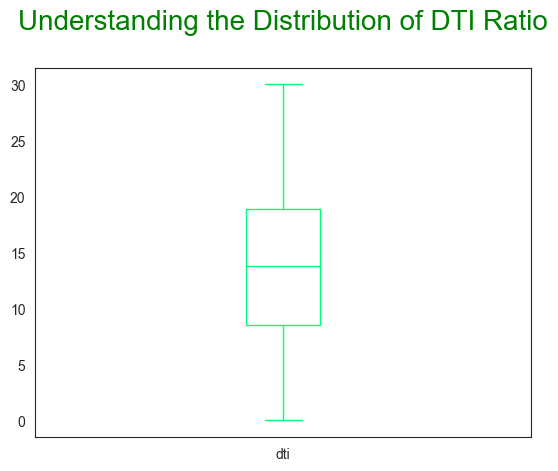

In [80]:
# plotting bar chart and setting bar aligning it to center
df_loan["dti"].plot.box(color='springgreen')

# Adding and formatting title
plt.title("Understanding the Distribution of DTI Ratio\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})


plt.show()

<font color='Orange'>***Insights***</font>:
 + Here dti ratio lies between 0 to 29.0
 + Where as maximum dti ratio lies between 10 to 20 

***delinq_2yrs*** : The number of 30+ days past-due incidences of delinquency(neglect of one's duty) in the borrower's credit file for the past 2 years

In [81]:
df_loan["delinq_2yrs"].describe()

count    30445.000000
mean         0.143340
std          0.489895
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: delinq_2yrs, dtype: float64

In [82]:
df_loan["delinq_2yrs"].value_counts()

delinq_2yrs
0     27217
1      2478
2       507
3       164
4        45
5        17
6        10
7         4
8         2
11        1
Name: count, dtype: int64

+ here maximum are 0 (approximatly 31,967 are 0) 
+ so we remove these columns 

***earliest_cr_line*** : The month the borrower's earliest reported credit line was opened

In [83]:
df_loan["earliest_cr_line"].value_counts()

earliest_cr_line
Oct-99    302
Nov-98    296
Dec-98    284
Oct-00    283
Nov-00    276
         ... 
Dec-50      1
Jan-68      1
Aug-73      1
Aug-68      1
Jan-72      1
Name: count, Length: 497, dtype: int64

In [84]:
df_loan["earliest_cr_line_year"]=df_loan["earliest_cr_line"].apply(lambda x : x[-2:])

In [85]:
df_loan["earliest_cr_line"] = df_loan["earliest_cr_line"].apply(lambda x : x[:3])

<Axes: xlabel='earliest_cr_line'>

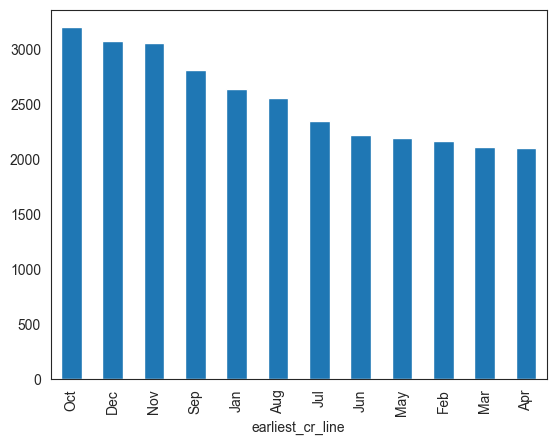

In [86]:
df_loan["earliest_cr_line"].value_counts().plot.bar()

<font color='Orange'>***Insights***</font>
 + given with year so we need to split months with year 
 + oct month maximum people opened credit line
 + year end is were maximum times people opened credit line

**Column 26 is 'inq_last_6mths'**: The number of inquiries in past 6 months (excluding auto and mortgage inquiries)


<Axes: xlabel='inq_last_6mths'>

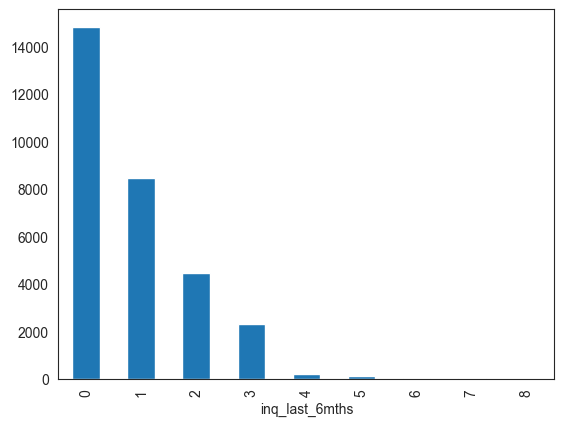

In [87]:
df_loan["inq_last_6mths"].value_counts().plot.bar()

* Datatype is int
* No:of null value - 0
* From the graph we get to understand majority of the people have no inquiries 

**Column 27 is 'open_acc'**
* The number of open credit lines in the borrower's credit file.*
* Datatype is int
* No:of null value - 0

In [88]:
df_loan["open_acc"].describe()

count    30445.000000
mean         9.071375
std          4.278636
min          2.000000
25%          6.000000
50%          8.000000
75%         11.000000
max         38.000000
Name: open_acc, dtype: float64

***Column 28 is 'revol_util'*** : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit


In [89]:
df_loan["revol_util"].value_counts()

revol_util
0%        701
46.40%     50
61%        49
32%        49
31.20%     48
         ... 
77.63%      1
25.74%      1
0.83%       1
47.36%      1
7.28%       1
Name: count, Length: 1073, dtype: int64

In [90]:
df_loan["revol_util"].apply(lambda x : x if type(x) == float else float(x[:-1]) )

1         9.4
3        21.0
5        28.3
6        85.6
7        87.5
         ... 
39551    96.5
39562    68.7
39623    62.9
39666    34.3
39680    70.9
Name: revol_util, Length: 30445, dtype: float64

* Datatype is converted from object to float 
* No:of null value - 50

**Column 29 is 'total_acc'**

* The total number of credit lines currently in the borrower's credit file
* Datatype is object 
* No:of null value - 0 

In [91]:
df_loan["total_acc"].value_counts()

total_acc
14    1192
15    1187
17    1181
13    1160
16    1156
      ... 
81       1
78       1
72       1
87       1
2        1
Name: count, Length: 77, dtype: int64

**Column 30 is 'initial_list_status'**

* The initial listing status of the loan. Possible values are – W, F
* Datatype is int
* No:of null value - 0 
* This is not helpful 

In [92]:
df_loan["initial_list_status"].value_counts()

initial_list_status
f    30445
Name: count, dtype: int64

In [93]:
df_loan=df_loan.drop("initial_list_status",axis=1)

In [94]:
df_loan.shape #current shape ofter droping the columns

(30445, 53)

**Column 31 is 'out_prncp'**

* Remaining outstanding principal for total amount funded
* Datatype is float 
* No:of null value - 0 
 

In [95]:
df_loan["out_prncp"].value_counts()

out_prncp
0.0    30445
Name: count, dtype: int64

**Column 32 is 'out_prncp_inv'**

* Remaining outstanding principal for portion of total amount funded by investors
* Datatype is float 
* No:of null value - 0 
* Similar to column 31, so can remove

In [96]:
df_loan=df_loan.drop("out_prncp_inv",axis=1)

In [97]:
df_loan.shape # current shape ofter droping the columns

(30445, 52)

**Column 33 is 'total_pymnt'**

* Payments received to date for total amount funded
* Datatype is int 
* No:of null value - 0 
* need to check outlier

In [98]:
df_loan["out_prncp"].value_counts()

out_prncp
0.0    30445
Name: count, dtype: int64

**Column 34 is 'total_pymnt_inv'**

* Payments received to date for portion of total amount funded by investors
* Datatype is int 
* No:of null value - 0 
* need to remove - same as column 33

In [99]:
df_loan=df_loan.drop("total_pymnt_inv",axis=1)

In [100]:
df_loan.shape # current shape ofter droping the columns

(30445, 51)

**Column 35 is 'total_rec_prncp'**

* Principal received to date
* Datatype is float 
* No:of null value - 0 
* need to remove - similar to column 33 and 34

In [101]:
df_loan=df_loan.drop("total_rec_prncp",axis=1)

In [102]:
df_loan.shape # current shape ofter droping the columns

(30445, 50)

**Column 36 is 'total_rec_int'**

* Interest received to date
* Datatype is float 
* No:of null value - 0 

In [103]:
df_loan["total_rec_int"].value_counts()

total_rec_int
0.00       59
1196.57    23
1784.23    15
717.95     15
1148.14    14
           ..
21.50       1
1459.31     1
3027.73     1
240.40      1
579.66      1
Name: count, Length: 27094, dtype: int64

**Column 37 is 'total_rec_late_fee'**

* Late fees received to date
* Datatype is int 
* No:of null value - 0 

In [104]:
df_loan["total_rec_late_fee"].value_counts()

total_rec_late_fee
0.000000     28930
15.000000      201
15.000000       48
30.000000       42
15.000000       38
             ...  
23.230000        1
29.955775        1
14.930384        1
19.940000        1
52.262227        1
Name: count, Length: 952, dtype: int64

**Column 38 is 'recoveries'**

* post charge off gross recovery
* Datatype is int 
* No:of null value - 0 

In [105]:
df_loan[df_loan["recoveries"] > 0]["recoveries"].describe()

count     3269.000000
mean       718.601502
std       1466.019008
min          6.300000
25%        101.320000
50%        299.310000
75%        710.020000
max      21810.310000
Name: recoveries, dtype: float64

**Column 39 is 'collection_recovery_fee'**

* post charge off collection fee
* Datatype is int 
* No:of null value - 0 
* some relation with column 39

In [106]:
df_loan["collection_recovery_fee"].value_counts()

collection_recovery_fee
0.0000      27521
2.0000         10
1.2000          9
1.6900          8
0.8000          8
            ...  
155.0340        1
4.1815          1
340.0000        1
258.9138        1
668.3600        1
Name: count, Length: 2048, dtype: int64

**Column 40 is 'last_pymnt_d'**

* Last month payment was received
* Datatype is object 
* No:of null value - 71 
* Can analyse to find insight about when the last payment was

In [107]:
df_loan["last_pymnt_d"].value_counts()

last_pymnt_d
Mar-13    826
Dec-14    756
May-13    730
Feb-13    698
Mar-12    695
         ... 
Aug-08      5
Sep-08      5
May-08      4
Nov-08      4
Jun-08      2
Name: count, Length: 97, dtype: int64

In [108]:
df_loan["last_pymnt_d_year"]=df_loan["last_pymnt_d"].apply(lambda x : x if type(x) == float else x[-2:])

In [109]:
df_loan["last_pymnt_d"]=df_loan["last_pymnt_d"].apply(lambda x : x if type(x) == float else x[:3])


<Axes: xlabel='last_pymnt_d'>

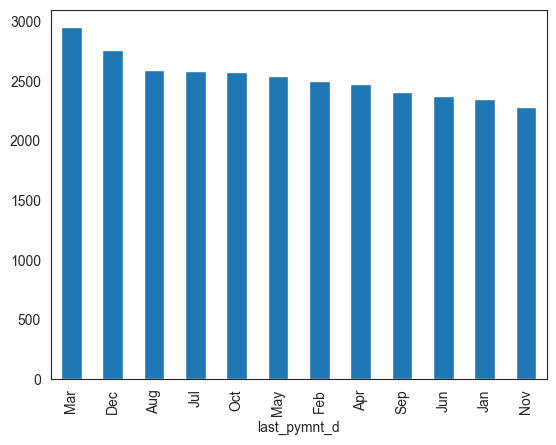

In [110]:
df_loan["last_pymnt_d"].value_counts().plot.bar()

<font color='Orange'>***Insights***</font>
  + may is highest people payed there last month payment 

**Column 41 is 'last_pymnt_amnt'**

* Last total payment amount received
* Datatype is int
* No:of null value - 0 

In [111]:
df_loan["last_pymnt_amnt"].describe()

count    30445.000000
mean      2394.332158
std       3743.515735
min          0.000000
25%        207.570000
50%        508.780000
75%       3160.730000
max      30340.500000
Name: last_pymnt_amnt, dtype: float64

**Column 42 is 'last_credit_pull_d'**

* The most recent month LC pulled credit for this loan
* Datatype is object
* No:of null value - 2 

**Column 43 is 'collections_12_mths_ex_med'**

* Number of collections in 12 months excluding medical collections
* Datatype is int
* No:of null value - 50
* Can be removed - 0 value in every column

In [112]:
df_loan=df_loan.drop("collections_12_mths_ex_med",axis=1)

In [113]:
df_loan.shape # current shape ofter droping the columns

(30445, 50)

**Column 44 is 'policy_code'**
* publicly available policy_code=1, new products not publicly available policy_code=2
* Datatype is int
* No:of null value - 0
* Can be removed 

In [114]:
df_loan=df_loan.drop("policy_code",axis=1)

In [115]:
df_loan.shape # current shape ofter droping the columns

(30445, 49)

**Column 45 is 'application_type'**
* Indicates whether the loan is an individual application or a joint application with two co-borrowers
* Datatype is object
* No:of null value - 0
* Can be removed - just 1 value

In [116]:
df_loan=df_loan.drop("application_type",axis=1)

In [117]:
df_loan.shape # current shape ofter droping the columns

(30445, 48)

**Column 46 is 'acc_now_delinq'**
* The number of accounts on which the borrower is now delinquent.
* Datatype is int
* No:of null value - 0
* Can be removed - just one value -that is 0

In [118]:
df_loan=df_loan.drop("acc_now_delinq",axis=1)

**Column 47 is 'chargeoff_within_12_mths'**
* Number of charge-offs within 12 months
* Datatype is float
* No:of null value - 0
* Can be removed - just one value -that is 0

In [119]:
df_loan=df_loan.drop('chargeoff_within_12_mths',axis=1)

**Column 48 is 'delinq_amnt'**
* The past-due amount owed for the accounts on which the borrower is now delinquent.
* Datatype is float
* No:of null value - 0
* Can be removed - just one value -that is 0

In [120]:
df_loan=df_loan.drop('delinq_amnt',axis=1)

**Column 49 is 'pub_rec_bankruptcies'**
* Number of public record bankruptcies
* Datatype is float
* No:of null value - 697
* Useful column

**Column 50 is 'tax_liens'**
* Number of tax liens
* Datatype is float
* No:of null value - 39
* Can be removed - just one value -that is 0

In [121]:
df_loan=df_loan.drop('tax_liens',axis=1)

In [122]:
df_loan.shape # current shape ofter droping the columns

(30445, 44)

In [123]:
Customer_behaviour_data = ['delinq_2yrs', "earliest_cr_line" ,'earliest_cr_line_year' , "inq_last_6mths" , "open_acc"  , "pub_rec" , "revol_bal" , 
                            "revol_util", "total_acc","out_prncp","total_pymnt","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee",
                                "last_pymnt_d",'last_pymnt_d_year',"last_pymnt_amnt","last_credit_pull_d"] 

### we have analysed the whole data  and found some columns are customer behaviour data which is collected before giving loan by here we assume that they have already got the loan so we can drop all these columns**

In [124]:
df_loan=df_loan.drop(Customer_behaviour_data,axis=1)

In [125]:
df_loan.shape

(30445, 25)

In [126]:
df_loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'zip_code', 'addr_state', 'dti',
       'pub_rec_bankruptcies', 'loan_approval', 'issue_d_month',
       'issue_d_year'],
      dtype='object')

<a id="cell2"></a>
## <font color='lightyello'> summary
+ Understood the data clearly 
+ we done the cleaning were ever required 
+ done the univariant analysis if required for that column 
+ we derived some important insights 
+ derived some columns where ever reqired to get more informations like loan approved ratio etc 
+ we left with 25 columns
+ we have figured out what all columns are customer behaviour columns

In [127]:
df_loan.columns #left columns which we can do bivarient analysis

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'zip_code', 'addr_state', 'dti',
       'pub_rec_bankruptcies', 'loan_approval', 'issue_d_month',
       'issue_d_year'],
      dtype='object')

<a id="Bivariant"></a>
# <font color='green'> Bivariant Analysis </font>

## <font color='lightyello'>Relating Between Loan Status and Loan Amount 

C:\Users\Yatha\AppData\Local\Temp\ipykernel_7336\3065873092.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="loan_status",y="loan_amnt", data=df_loan,palette="hls")


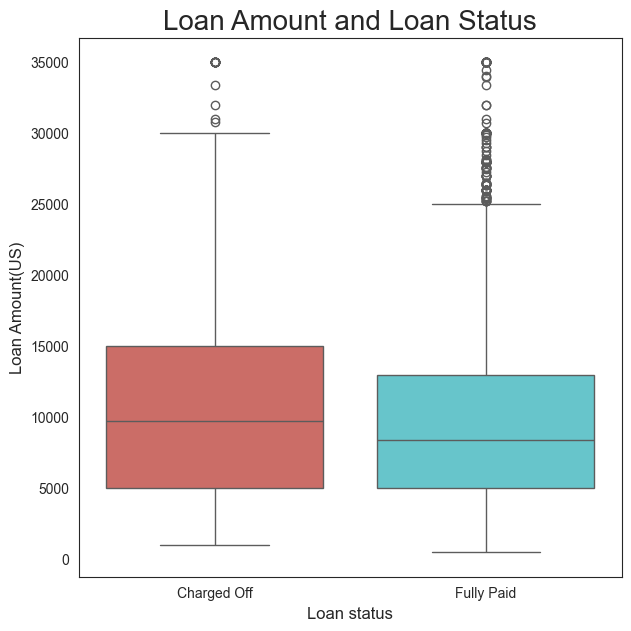

In [128]:
plt.figure(figsize = (7,7))


sns.boxplot(x="loan_status",y="loan_amnt", data=df_loan,palette="hls")
plt.xlabel("Loan status", fontsize=12)
plt.ylabel("Loan Amount(US)", fontsize=12)
plt.title("Loan Amount and Loan Status", fontsize=20)

plt.show()

<font color='Orange'>***Insights***</font>:
+ By observing the median and 3rd quartile people who have taken higher loan amount are likely to charge off 

## <font color='lightyello'>Relating Between Loan Status and Loan Term

In [129]:
term_loanstatus = pd.crosstab(index=df_loan['term'], columns=df_loan['loan_status'], normalize=0).reset_index()
term_loanstatus

loan_status,term,Charged Off,Fully Paid
0,36 months,0.106806,0.893194
1,60 months,0.252747,0.747253


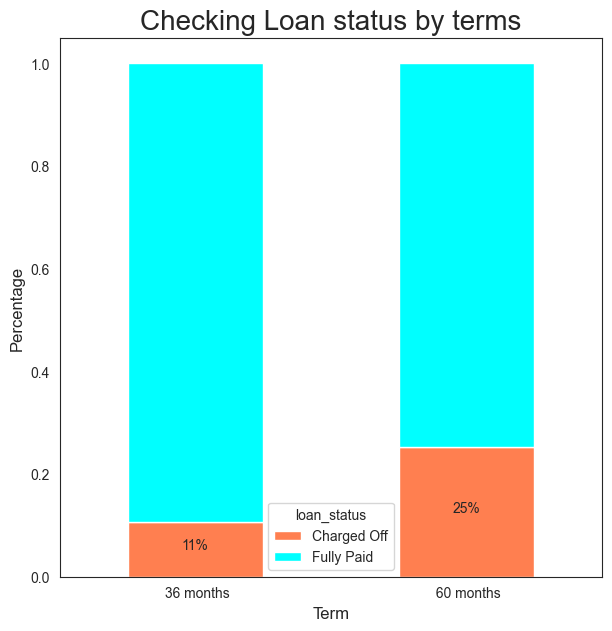

In [130]:
#create stacked bar chart
term_loanstatus.set_index('term').plot(kind='bar', stacked=True, color=['coral','aqua'] ,figsize=(7,7))

for idx, row in term_loanstatus.iterrows():
    plt.text(idx-.05, row['Charged Off']/2, "{:.0%}".format(row['Charged Off']))

plt.xticks(rotation=0)

plt.xlabel("Term", fontsize=12)
plt.ylabel("Percentage", fontsize=12)
plt.title("Checking Loan status by terms", fontsize=20)

plt.show()

 <font color='Orange'>***Insights***</font>: 
+ The percentage of defaulters are higher in 60 months term with about 25% charge-off whereas it is just 11% for 36 month term
+ So, there is a possibility that longer term loans are more risky and prone to higher default

## <font color='lightyello'>Relating Between Loan Status and Interest Rate

In [131]:
df_loan_intrest =df_loan.groupby('loan_status').agg({'int_rate': 'median'})

C:\Users\Yatha\AppData\Local\Temp\ipykernel_7336\1481630135.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="loan_status",y="int_rate", data=df_loan,palette="hls")


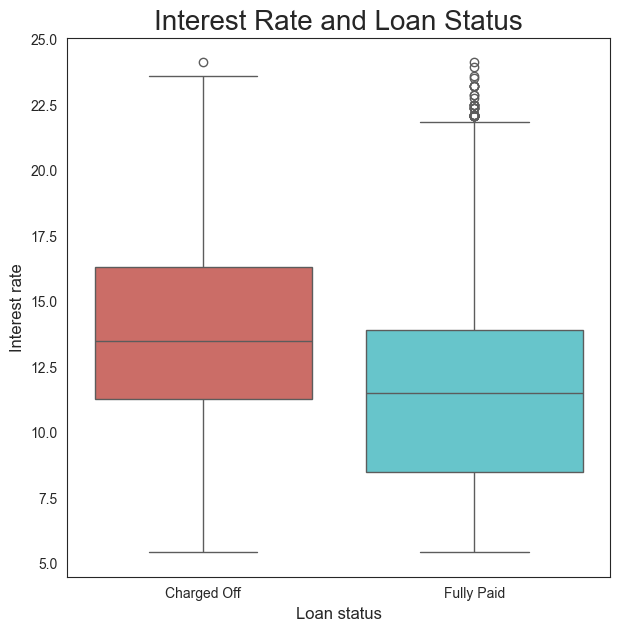

In [132]:
plt.figure(figsize = (7,7))


sns.boxplot(x="loan_status",y="int_rate", data=df_loan,palette="hls")
plt.xlabel("Loan status", fontsize=12)
plt.ylabel("Interest rate", fontsize=12)
plt.title("Interest Rate and Loan Status", fontsize=20)


plt.show()

 <font color='Orange'>***Insights***</font>: 
+ The interest rate in charged off were higher than that of fully paid which may be infer that higher interest rate could result in higher charge offs

## <font color='lightyello'>Relating Between Loan Status and Home Ownership

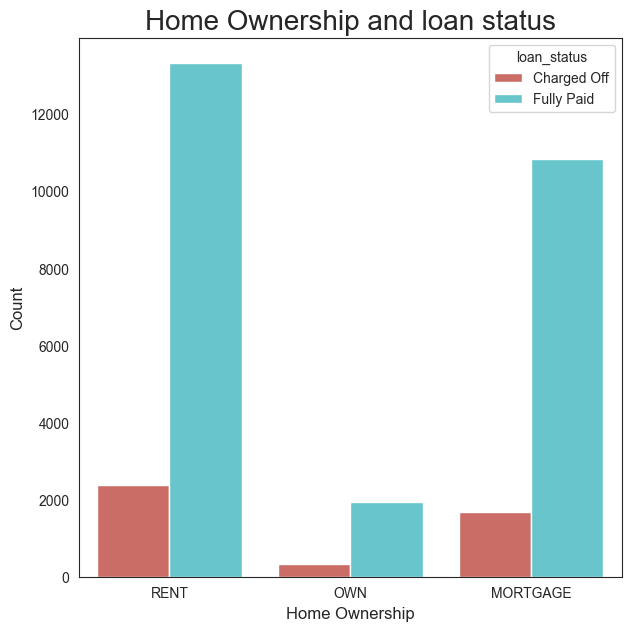

In [133]:
plt.figure(figsize = (7,7))


sns.countplot(x="home_ownership" ,data=df_loan, hue="loan_status" , palette="hls")
plt.xlabel("Home Ownership", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Home Ownership and loan status", fontsize=20)


plt.show()

<font color='Orange'>***Insights***</font>:
+ people who have stay in rent and are in mortagage are likely to be charged off (we need to be careful while giving the loan)
+ people who have own house are less likely to be charged off compared to people who stay in rent and mortage

## <font color='lightyello'>Relating Between Loan Status and monthly Installment Amount

C:\Users\Yatha\AppData\Local\Temp\ipykernel_7336\1358269286.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="loan_status",y="installment", data=df_loan,palette="hls")


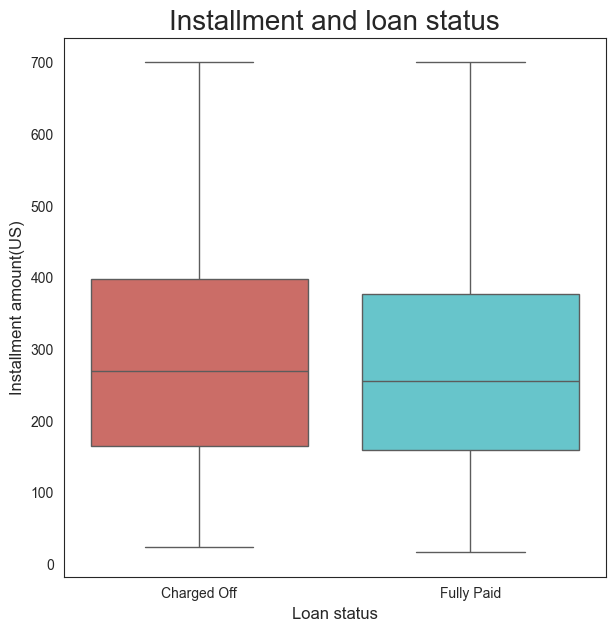

In [134]:
plt.figure(figsize = (7,7))


sns.boxplot(x="loan_status",y="installment", data=df_loan,palette="hls")
plt.xlabel("Loan status", fontsize=12)
plt.ylabel("Installment amount(US)", fontsize=12)
plt.title("Installment and loan status", fontsize=20)


plt.show()

<font color='Orange'>***Insights***</font> : 
+ By observing median and 3rd quartile charged off are higher than fully paid
+ People with high installment amount are likely to be charged off 
 

## <font color='lightyello'>Relating Between Loan Status and grade of loan

In [135]:
grade_loanstatus = pd.crosstab(index=df_loan['grade'], columns=df_loan['loan_status'], normalize=0).reset_index()
grade_loanstatus

loan_status,grade,Charged Off,Fully Paid
0,A,0.059585,0.940415
1,B,0.121609,0.878391
2,C,0.172109,0.827891
3,D,0.219618,0.780382
4,E,0.273166,0.726834
5,F,0.322169,0.677831
6,G,0.389535,0.610465


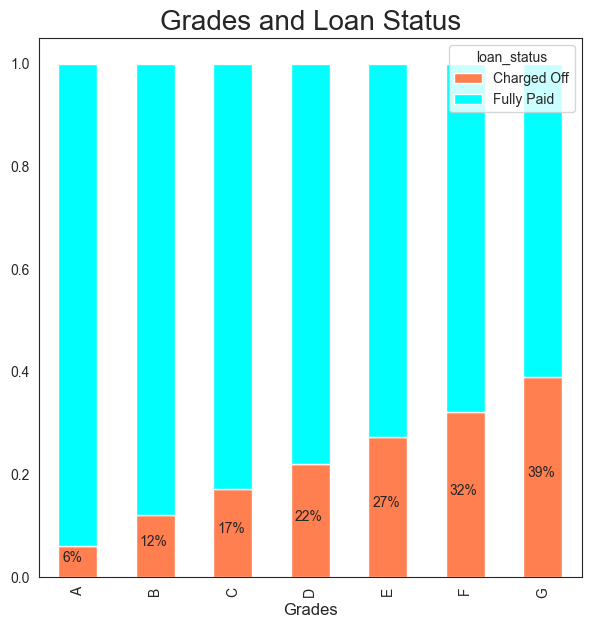

In [136]:

#create stacked bar chart
grade_loanstatus.set_index('grade').plot(kind='bar', stacked=True, color=['coral','aqua'],figsize=(7,7))

for idx, row in grade_loanstatus.iterrows():
    plt.text(idx-.2, row['Charged Off']/2, "{:.0%}".format(row['Charged Off']))
    
plt.xlabel("Grades", fontsize=12)
plt.title("Grades and Loan Status", fontsize=20)
plt.show()

 <font color='Orange'>***Insights***</font>: 
+ Lower grade loans results in higher charge offs.
+ We can see as grades gets lower, charge off rate increases proportionately

## <font color='lightyello'>Relating Between Loan Status and subgrade of loan

In [137]:
subgrade_loanstatus = pd.crosstab(index=df_loan['sub_grade'], columns=df_loan['loan_status'], normalize=0).reset_index()
subgrade_loanstatus.head()

loan_status,sub_grade,Charged Off,Fully Paid
0,A1,0.025471,0.974529
1,A2,0.050162,0.949838
2,A3,0.050204,0.949796
3,A4,0.060670,0.939330
4,A5,0.083784,0.916216


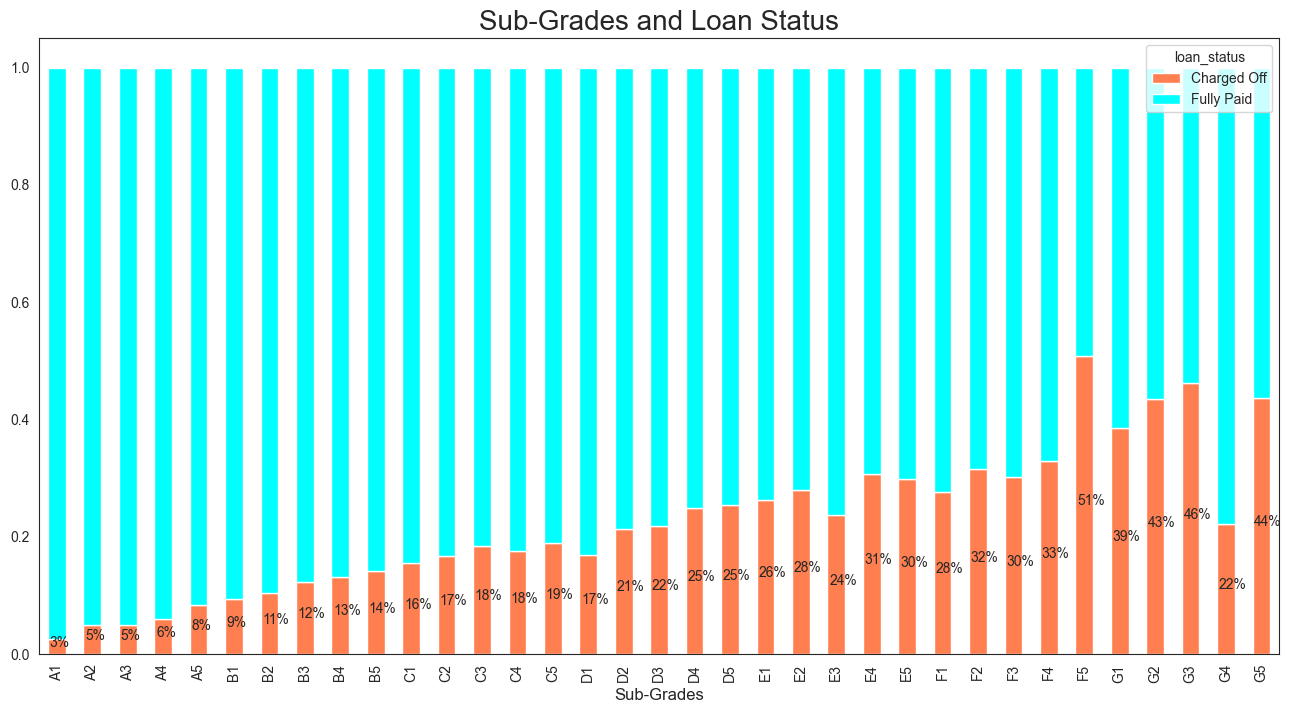

In [138]:
#create stacked bar chart

axes = subgrade_loanstatus.set_index('sub_grade').plot(kind='bar', stacked=True, color=['coral','aqua'])

# extract the figure object
fig = axes.get_figure()

for i, row in subgrade_loanstatus.iterrows():
    plt.text(i-.2, row['Charged Off']/2, "{:.0%}".format(row['Charged Off']))
    
fig.set_size_inches((16, 8))
plt.xlabel("Sub-Grades", fontsize=12)
plt.title("Sub-Grades and Loan Status", fontsize=20)
plt.show()

 <font color='Orange'>***Insights***</font>: 
+ We can see as sub-grades gets lower, charge off rate increases proportionately
+ A1 grade is one of the best grade to give the loan 

## <font color='lightyello'>Relating Between Loan Status and Employment Experience 

In [139]:
def bucket(x): # creating buckets for getting more insights
    if(x==0):
        return "Fresher"
    elif(x>=1 and x<3):
        return "1-3"
    elif(x>=3 and x<5):
        return "3-5"
    elif(x>=5 and x<7):
        return "5-7"
    elif(x>=7 and x<10):
        return "7-10"
    elif(x>=10):
        return "10+"
        

In [140]:
df_loan["emp_length_buckets"]=df_loan.emp_length.apply(bucket)

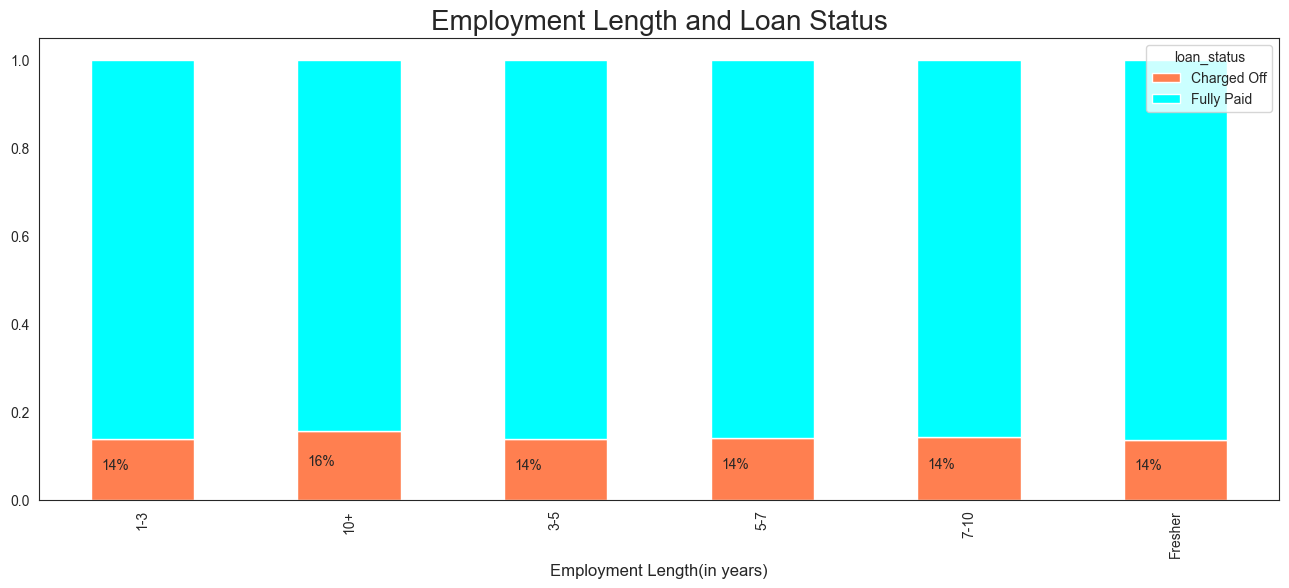

In [141]:
crosstab_emplen_status = pd.crosstab(index=df_loan['emp_length_buckets'], columns=df_loan['loan_status'], normalize=0).reset_index()
#create stacked bar chart

axes = crosstab_emplen_status.set_index('emp_length_buckets').plot(kind='bar', stacked=True, color=['coral','aqua'])

# extract the figure object
fig = axes.get_figure()

for idx, row in crosstab_emplen_status.iterrows():
    plt.text(idx-.2, row['Charged Off']/2, "{:.0%}".format(row['Charged Off']))
    
fig.set_size_inches((16, 6))
plt.xlabel("Employment Length(in years)", fontsize=12)
plt.title("Employment Length and Loan Status", fontsize=20)
plt.show()

<font color='Orange'>***Insights***</font>:
+ there is not much difference in years of experience 
+ but there is slight people with higher expererience are likely to charged off (above 10years )

## <font color='lightyello'>Relating Between Loan Status and Annual Income

C:\Users\Yatha\AppData\Local\Temp\ipykernel_7336\2128714387.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="loan_status",y="annual_inc", data=df_loan,palette="hls")


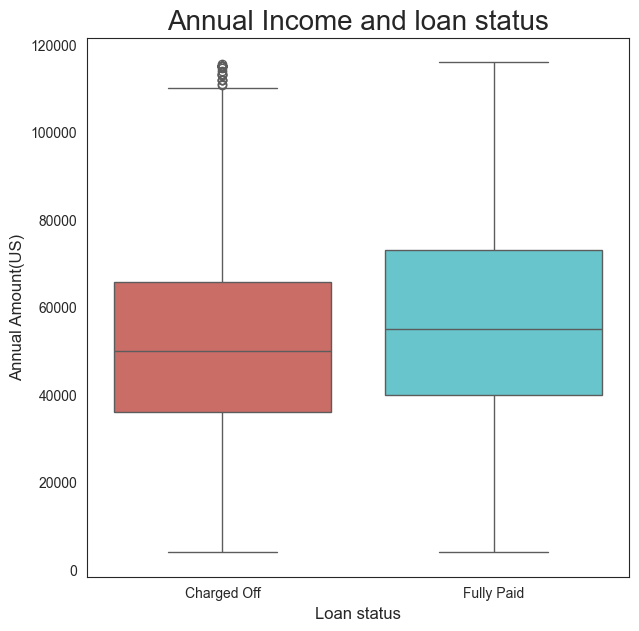

In [142]:
plt.figure(figsize = (7,7))


sns.boxplot(x="loan_status",y="annual_inc", data=df_loan,palette="hls")
plt.xlabel("Loan status", fontsize=12)
plt.ylabel("Annual Amount(US)", fontsize=12)
plt.title("Annual Income and loan status", fontsize=20)


plt.show()

<font color='Orange'>***Insights***</font>:
+ The median annual income is less for charged off persons
+ People having less income are more likely to default. 

## <font color='lightyello'>Relating Between Loan Status and Purpose

In [143]:
crosstab_purpose_status = pd.crosstab(index=df_loan['purpose'], columns=df_loan['loan_status'], normalize=0).reset_index()
crosstab_purpose_status

loan_status,purpose,Charged Off,Fully Paid
0,car,0.109049,0.890951
1,credit_card,0.105716,0.894284
2,debt_consolidation,0.151767,0.848233
3,educational,0.167969,0.832031
4,home_improvement,0.119843,0.880157
5,house,0.153846,0.846154
6,major_purchase,0.101983,0.898017
7,medical,0.157324,0.842676
8,moving,0.161290,0.838710
9,other,0.158333,0.841667


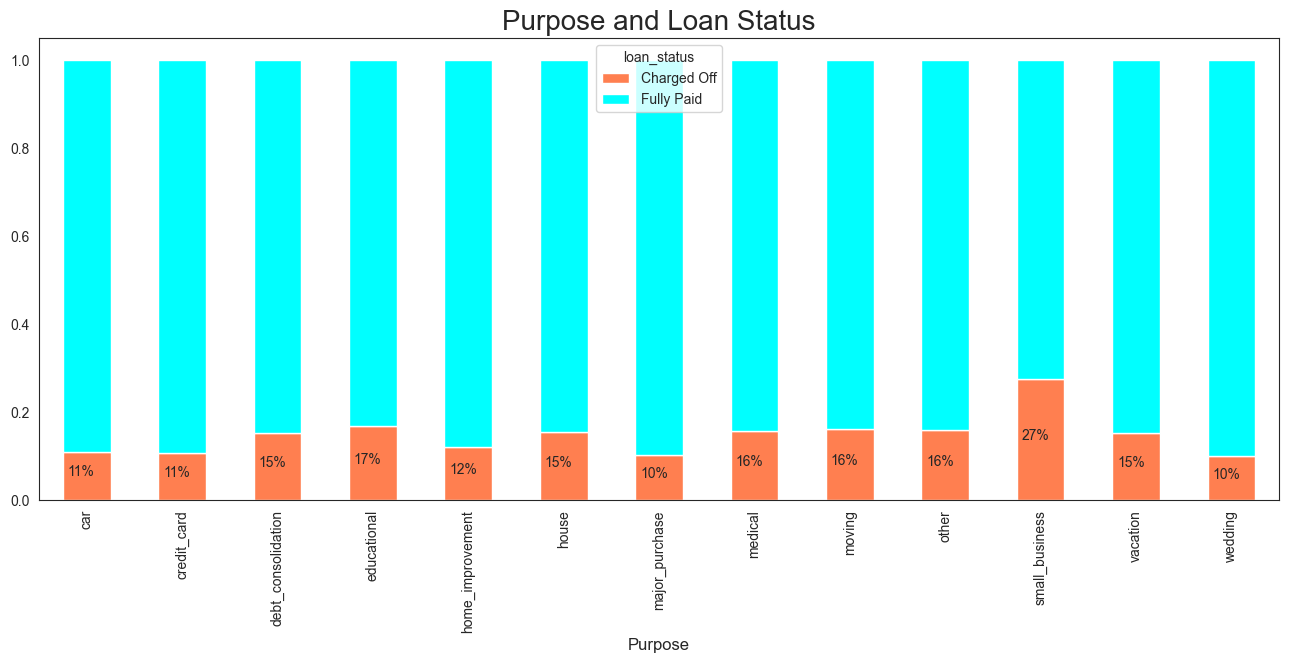

In [144]:
#create stacked bar chart

axes = crosstab_purpose_status.set_index('purpose').plot(kind='bar', stacked=True, color=['coral','aqua'])

# extract the figure object
fig = axes.get_figure()

for idx, row in crosstab_purpose_status.iterrows():
    plt.text(idx-.2, row['Charged Off']/2, "{:.0%}".format(row['Charged Off']))
    
fig.set_size_inches((16, 6))
plt.xlabel("Purpose", fontsize=12)
plt.title("Purpose and Loan Status", fontsize=20)
plt.show()

<font color='Orange'>***Insights***</font>:
+ Small business are more likely to charge off compared to other purpose as they are the 28% of people who charged off

## <font color='lightyello'>Relating Between Loan Status and DTI Ratio

C:\Users\Yatha\AppData\Local\Temp\ipykernel_7336\1125066568.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="loan_status",y="dti", data=df_loan,palette="hls")


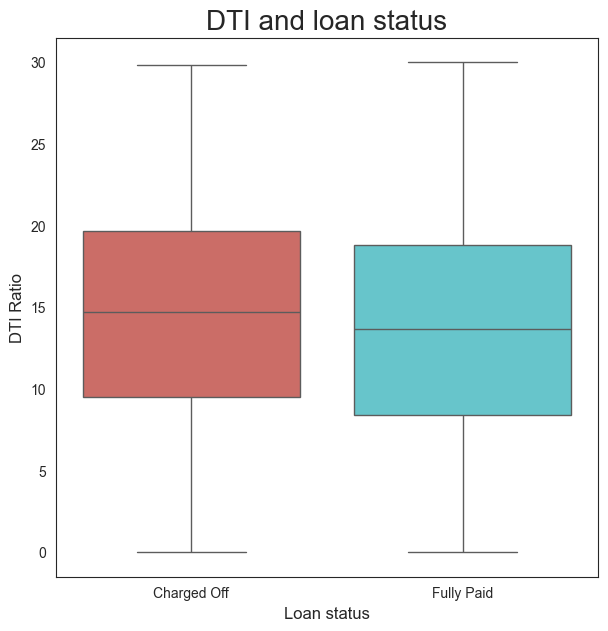

In [145]:
plt.figure(figsize = (7,7))


sns.boxplot(x="loan_status",y="dti", data=df_loan,palette="hls")
plt.xlabel("Loan status", fontsize=12)
plt.ylabel("DTI Ratio", fontsize=12)
plt.title("DTI and loan status", fontsize=20)


plt.show()

<font color='Orange'>***Insights***</font>:
  + Higher the dti are more likely to charged off 

## <font color='lightyello'>Relating public bankruptcies with loan status

In [146]:
bankrupt_loanstatus = pd.crosstab(index=df_loan['pub_rec_bankruptcies'], columns=df_loan['loan_status'], normalize=0).reset_index()
bankrupt_loanstatus

loan_status,pub_rec_bankruptcies,Charged Off,Fully Paid
0,0.0,0.139829,0.860171
1,1.0,0.211553,0.788447
2,2.0,0.400000,0.600000


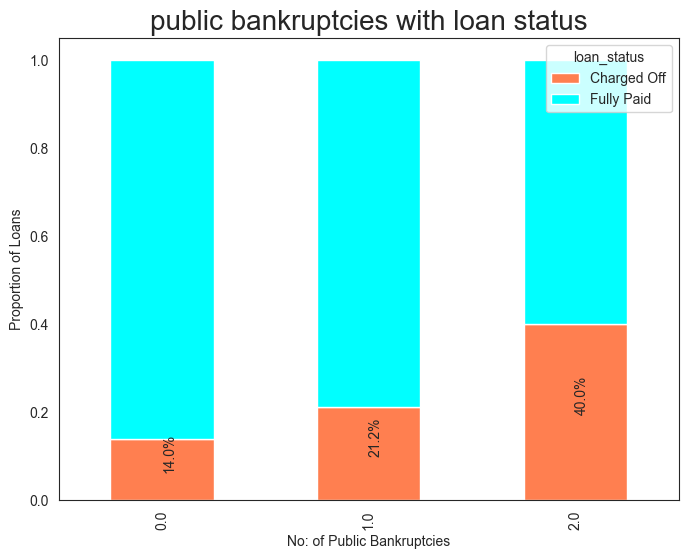

In [147]:
#creating stacked bar chart

axes = bankrupt_loanstatus.set_index('pub_rec_bankruptcies').plot(kind='bar', stacked=True, color=['coral','aqua'])

# figure object extraction
fig = axes.get_figure()

for i, row in bankrupt_loanstatus.iterrows():
    plt.text(i, row['Charged Off']/2, "{:.1%}".format(row['Charged Off']), rotation=90)

plt.xlabel('No: of Public Bankruptcies')
plt.ylabel('Proportion of Loans')

fig.set_size_inches((8, 6))
plt.title("public bankruptcies with loan status", fontsize=20)
plt.show()

<font color='Orange'>***Insights***</font>
+ As number of bankruptcies increases the charge off rate also increases